<a href="https://colab.research.google.com/github/AnitaKirkovska/Quantum_Computing/blob/master/HW2/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 2

Problem 1

Implement a simulation of the Hadamard test for any qubit state |psi> and any single qubit unitary U using numpy. Observe that you have to compute how the state of the quantum register changes. It is not enough to just code up the formula for the probabilities that we derived in class.

Recall that you can realize the controlled-U gate as follows: |0><0| otimes I + |1><1| otimes U. Use the numpy command np.kron for the tensor product.

For |psi> use the state |0> and for the unitary U use the orthogonal matrix that describes the rotation by angle 2 pi theta, where theta [0, 1).

Create a plot showing the probability Pr(0) in dependence on theta.

Problem 2

Implement a simulation of the SWAP test.

Use |psi1> = |0> and |psi2> = cos(2 pi theta) |0> + sin(2 pi theta) |1>. Create a plot showing the probability Pr(0) in dependence on theta.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from numpy import kron
from numpy import outer,matmul, multiply
from numpy import linalg, array
from math  import cos,sin,pi

# Problem 1

In [0]:
#using np.kron for tensor products to simulate a Hadamard test 


phi=np.multiply(np.arange(0,1,0.01),2*math.pi)
prob = []

for i in range(len(phi)):
  U = array([[cos(phi[i]),sin(phi[i])],[-sin(phi[i]),cos(phi[i])]])
  prob.append(H_test(([1,0]),([1,0]),U))

def H_test(k_control,k_register,U):

  kt0 = [1,0]
  kt1 = [0,1]
  kt00 = kron(kt0,kt0)
  kt01 = kron(kt0,kt1)
  kt10 = kron(kt1,kt0)
  kt11 = kron(kt0,kt1)

  plus = np.array([1,1])/math.sqrt(2)
  minus=np.array([1,-1])/math.sqrt(2)
  both = ([plus,minus])

  #Building hadamard kronecker product with identity matrix
  In = np.identity(len(k_register))
  Hd = kron((np.transpose(both)),In)

  #Calculating states
  U = kron(outer(kt0,kt0),In) + kron(outer(kt1,kt1),U)
  state = kron(k_control, k_register)

  state = matmul(Hd, state)
  state = matmul(U,state)
  state = matmul(Hd,state)

  proj = kron(outer(kt0,kt0),In)
  prob = linalg.norm(matmul(proj,state),ord=2)**2

  return prob

Showing the probability Pr(0) in dependence on theta

Prob(0) = $\frac{1}{2} \big(1 + \cos(\phi) \big)$ 

and

$$
U=\begin{bmatrix}
cos(\phi) & sin(\phi) \\ -sin(\phi) & cos(\phi)
\end{bmatrix}
$$

Hadamard test probability outputting zero is plotted for $\theta\in \left[0,1\right)$.


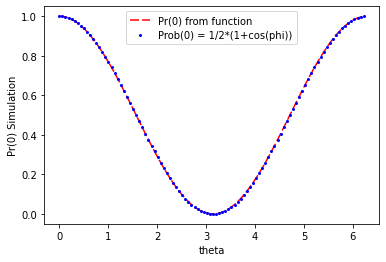

In [153]:
plt.plot(phi,prob,dashes=[6, 2], color='red',label='Pr(0) from function')
plt.plot(phi,1/2*(1+np.cos(phi)),'r.', color='blue', markersize=4, label='Prob(0) = 1/2*(1+cos(phi))')
plt.xlabel('theta')
plt.ylabel('Pr(0) Simulation')
plt.legend()

# Problem 2

In [0]:
kt0 = [1,0]
kt1 = [0,1]
kt00 = kron(kt0,kt0)
kt01 = kron(kt0,kt1)
kt10 = kron(kt1,kt0)
kt11 = kron(kt0,kt1)

Swap = outer(kt00,kt00) + outer(kt01,kt10) + outer(kt10,kt01) + outer(kt11,kt11)
phi=np.multiply(np.arange(0,1,0.01),2*math.pi)
prob = []

for j in range(len(phi)):
  psi= kron(kt0, multiply(cos(phi[j]),kt0) + multiply(sin(phi[j]),kt1))
  prob.append(H_test(kt0,psi,Swap))

Showing the probability Pr(0) in dependence on theta

Prob(0) = $\frac{1}{2}\big(1 + \cos^2(\phi)\big)$

and

\begin{align*}
U=\begin{bmatrix}
\cos(\phi)\\\sin(\phi)\\0\\0
\end{bmatrix}
\end{align*}

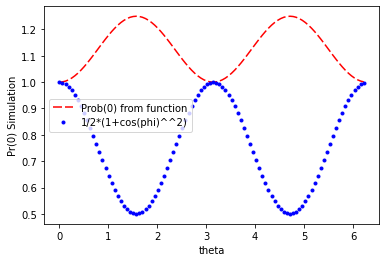

In [156]:
plt.plot(phi,prob,dashes=[6, 2], color='red',label='Prob(0) from function')
plt.plot(phi,1/2*(1+np.cos(phi)**2),'r.',color='blue',label='1/2*(1+cos(phi)^^2)')
plt.xlabel('theta')
plt.ylabel('Pr(0) Simulation')

plt.legend()